In [30]:
#%pip install -U azure.ai.ml mltable

In [31]:
#%pip install -U dowhy

Found the config file in: /config.json


Index(['Gender', 'Marital_status', 'Displaced', 'Educational_special_needs',
       'Debtor', 'Tuition_fees_up_to_date', 'Scholarship_holder',
       'International', 'Daytime_evening_attendance', 'Unemployment_rate',
       'Inflation_rate', 'GDP', 'binary_target'],
      dtype='object')


Depth=5, working on node 12: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 581.37it/s]


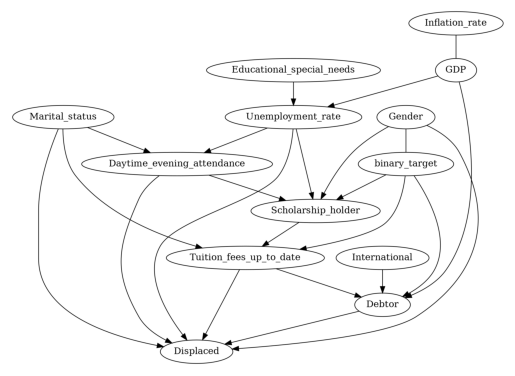

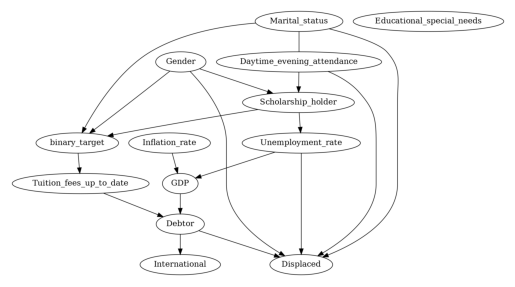

/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


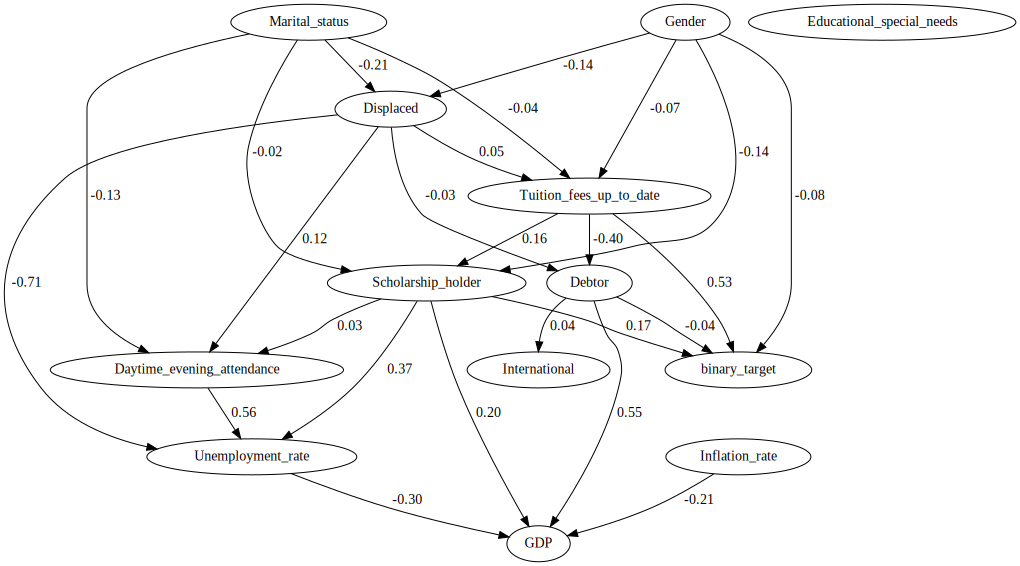

In [32]:
#args
training_data = "azureml:academic_sucess_train_mltable:17"

import pandas as pd
import numpy as np
import mltable
from causallearn.search.ConstraintBased.PC import pc
from causallearn.search.ScoreBased.GES import ges
from causallearn.search.FCMBased import lingam

from causallearn.utils.GraphUtils import GraphUtils
from causallearn.search.FCMBased.lingam.utils import make_dot
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import io

np.set_printoptions(precision=3, suppress=True)
np.random.seed(0)

tbl = mltable.load(training_data)
train_df = tbl.to_pandas_dataframe()
train_df.dropna(inplace=True,how="all")
print(train_df.columns)

train_df['Gender'] = train_df['Gender'].astype(int)
train_df['Marital_status'] = train_df['Marital_status'].astype(int)
train_df['Displaced'] = train_df['Displaced'].astype(int)
train_df['Educational_special_needs'] = train_df['Educational_special_needs'].astype(int)
train_df['Debtor'] = train_df['Debtor'].astype(int)
train_df['Tuition_fees_up_to_date'] = train_df['Tuition_fees_up_to_date'].astype(int)
train_df['Scholarship_holder'] = train_df['Scholarship_holder'].astype(int)
train_df['International'] = train_df['International'].astype(int)
train_df['Daytime_evening_attendance'] = train_df['Daytime_evening_attendance'].astype(int)

train_df['binary_target'] = train_df['binary_target'].replace(("Graduated/Still Enrolled", "Dropout"), (1, 0))

labels = [f'{col}' for i, col in enumerate(train_df.columns)]

train_np = train_df.to_numpy()

cg = pc(train_np)

pyd = GraphUtils.to_pydot(cg.G, labels=labels)
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.axis('off')
plt.imshow(img)
plt.show()

#Ges
cg_ges = ges(train_np)

pyd = GraphUtils.to_pydot(cg_ges['G'], labels=labels)
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.axis('off')
plt.imshow(img)
plt.show()

#LINGAM
model_lingam = lingam.ICALiNGAM()
model_lingam.fit(train_np)
make_dot(model_lingam.adjacency_matrix_, labels=labels)